In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import FinanceDataReader as fdr
from pykrx import stock
from matplotlib import font_manager, rc

plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False

c:\Users\lunar\anaconda3\envs\project\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


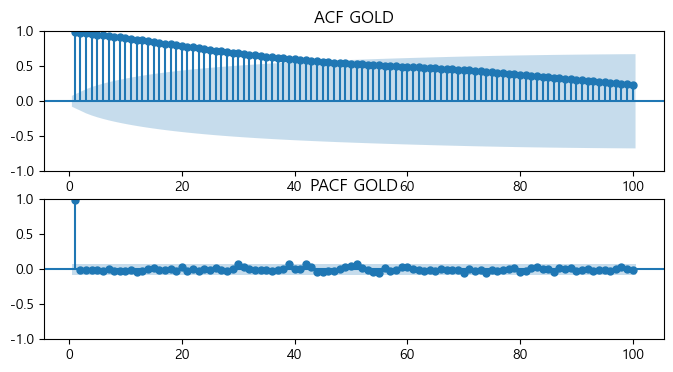

In [97]:
# ACF, PACF TEST
import statsmodels.graphics.tsaplots as sgt

gold = pd.read_csv('USGOLD.csv')
gold.index = [k for k in range(len(gold.index))]
gold_price = np.log(np.array(gold['종가']))

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

sgt.plot_acf(gold_price, lags=100, zero=False, ax=ax1)
ax1.set_title('ACF GOLD')

sgt.plot_pacf(gold_price, lags=100, zero=False, ax=ax2)
ax2.set_title('PACF GOLD')

plt.show()

In [98]:
from statsmodels.tsa.stattools import adfuller

def adf_test(array):
    result = adfuller(array)
    print('ADF Statistics: %f'%result[0])
    print('p-value: %f'%result[1])
    print('Critical values')
    for key, value in result[4].items():
        print('\t%s: %.3f'%(key, value))


adf_test(gold['종가'])
print('----------------------')

ADF Statistics: -0.348902
p-value: 0.918287
Critical values
	1%: -3.441
	5%: -2.866
	10%: -2.569
----------------------


In [99]:
def local_normalization(array, size=82):
    data = []
    iteration = len(array) - size + 1
    for i in range(0,iteration):
        tmp = array[i:size+i]
        mean = np.mean(tmp)
        sd = np.std(tmp)
        data.append((array[size+i-1]-mean)/sd)
    return np.array(data)

c:\Users\lunar\anaconda3\envs\project\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


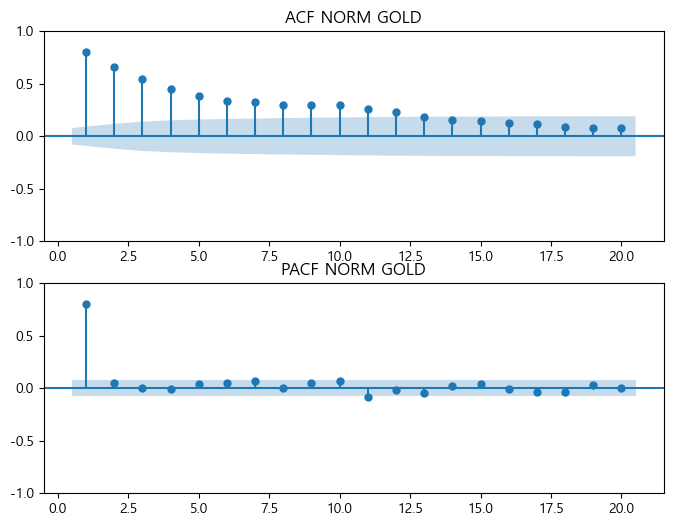

In [100]:
norm_gold = local_normalization(np.array(gold['종가']), 10)

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

sgt.plot_acf(norm_gold, lags=20, zero=False, ax=ax1)
ax1.set_title('ACF NORM GOLD')

sgt.plot_pacf(norm_gold, lags=20, zero=False, ax=ax2)
ax2.set_title('PACF NORM GOLD')

plt.show()

Text(0.5, 1.0, 'SD')

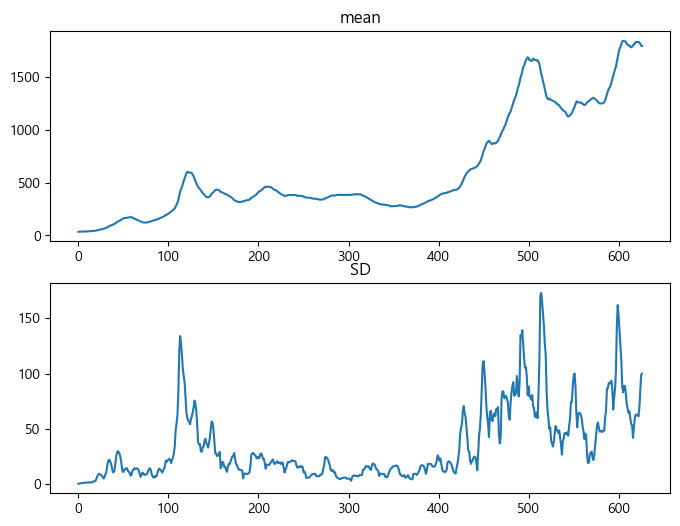

In [101]:
def mean_sd(array, size=82):
    m = []
    s = []
    iteration = len(array) - size + 1
    for i in range(iteration):
        tmp = array[i:size+i]
        mean = np.mean(tmp)
        sd = np.std(tmp)
        m.append(mean)
        s.append(sd)

    return np.array([np.array(m), np.array(s)])


fig = plt.figure(figsize=(8,6))

plt.subplot(2,1,1)
plt.plot(mean_sd(np.array(gold['종가']), 10)[0])
plt.title('mean')

plt.subplot(2,1,2)
plt.plot(mean_sd(np.array(gold['종가']), 10)[1])
plt.title('SD')

636 627


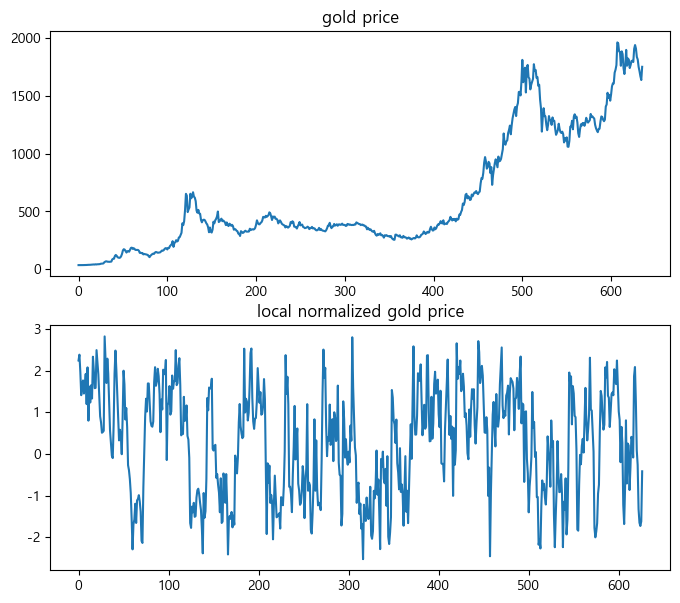

In [102]:
fig = plt.figure(figsize=(8,7))

plt.subplot(2,1,1)
plt.plot(gold['종가'])
plt.title('gold price')

plt.subplot(2,1,2)
plt.plot(norm_gold)
plt.title('local normalized gold price')

print(len(gold), len(norm_gold))

In [103]:
colm = ['A','B','C','D','E','F','G','H','I','J','K']
m = pd.read_csv('macro.csv')
macro = m[colm]

norm_macro = []
for i in range(len(colm)):
    norm_macro.append(local_normalization(macro[colm[i]],size=10))

norm_macro = pd.DataFrame(norm_macro).T
norm_macro.head()

KeyError: "None of [Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K'], dtype='object')] are in the [columns]"

In [ ]:
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

colm = ['A','B','C','D','E','F','G','H','I','J','K']
def date_range(start, end):
    start = datetime.strptime(start, '%Y-%m')
    end = datetime.strptime(end, '%Y-%m')
    diff = (end.year - start.year) * 12 + end.month - start.month
    dates = [(start + relativedelta(months=i)).strftime("%Y-%m") for i in range(diff+1)]
    return dates

dates = date_range('1988-02', '2022-11')

data = pd.concat([norm_macro, pd.DataFrame(norm_gold[209:])], axis=1)
print(len(data.index), len(dates))

colm.append('label')
data.index = dates
data.columns = np.array(colm)

418 418


In [ ]:
train_set, test_set = data.iloc[:350], data.iloc[350:]

test_set.head()

,A,B,C,D,E,F,G,H,I,J,K,label
2017-04,0.524606,1.780835,0.585624,0.076923,1.651472,0.950637,0.029059,-2.005223,0.650297,1.233377,1.432118,0.193947
2017-05,0.297086,1.531741,0.431659,0.500000,1.056076,1.421403,-0.459466,-1.570717,-0.010131,1.125429,1.217883,0.361393
2017-06,-0.652890,1.374357,-0.084639,2.315231,1.109740,1.556231,-1.479591,-0.228193,-1.194623,1.115010,1.364686,0.033114
2017-07,-0.889470,1.030208,0.179137,2.076584,1.258464,0.509120,-0.947902,0.168073,-0.662074,1.207478,1.305034,0.793924
2017-08,-1.640371,1.273660,-1.003901,0.459639,1.471073,0.695540,-1.413938,-0.102240,0.272105,1.490356,1.425704,1.584975


In [ ]:
import tensorflow as tf

input1 = tf.keras.layers.Input(shape=(22,1,12))
input2 = tf.keras.layers.Input(shape=(18,5,12))
input3 = tf.keras.layers.Input(shape=(13,10,12))


model1 = tf.keras.Sequential([
    input1,
    tf.keras.layers.Conv2D(12,(1,1), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Reshape((22,12)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(22, return_sequences=True), merge_mode='concat'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(5, return_sequences=True), merge_mode='concat'),
    tf.keras.layers.Flatten()
])

model2 = tf.keras.Sequential([
    input2,
    tf.keras.layers.Conv2D(12,(1,5), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Reshape((18,12)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(22, return_sequences=True), merge_mode='concat'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(5, return_sequences=True), merge_mode='concat'),
    tf.keras.layers.Flatten()
])

model3 = tf.keras.Sequential([
    input3,
    tf.keras.layers.Conv2D(12,(1,10), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Reshape((13,12)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(22, return_sequences=True), merge_mode='concat'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(5, return_sequences=True), merge_mode='concat'),
    tf.keras.layers.Flatten()
])

merged = tf.keras.layers.concatenate([model1.output, model2.output, model3.output])
output = tf.keras.layers.Dense(100)(merged)
output = tf.keras.layers.Dense(50)(output)
output = tf.keras.layers.Dense(25)(output)
output = tf.keras.layers.Dense(1)(output)

model = tf.keras.Model(inputs=[input1, input2, input3], outputs=[output])

model.summary()
model.compile('adam', loss='MeanSquaredError', metrics=['accuracy'])

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_44 (InputLayer)           [(None, 22, 1, 12)]  0                                            
__________________________________________________________________________________________________
input_45 (InputLayer)           [(None, 18, 5, 12)]  0                                            
__________________________________________________________________________________________________
input_46 (InputLayer)           [(None, 13, 10, 12)] 0                                            
__________________________________________________________________________________________________
conv2d_66 (Conv2D)              (None, 22, 1, 12)    156         input_44[0][0]                   
____________________________________________________________________________________________

In [ ]:
def gen_train_xy1(df):
    train_x = []
    df.fillna(1)
    for i in range(len(df.index)-21):
        tmp = []
        for k in range(22):
            tmp.append(np.array(df.iloc[i+k]).tolist())
        train_x.append(tmp)
    
    train_y = np.array(df['label'][21:])
    return np.array(train_x).reshape(-1,22,1,12), train_y

X1, Y = gen_train_xy1(train_set)
test_x1, test_y = gen_train_xy1(test_set)

def gen_train_xy2(df):
    train_x = []
    df.fillna(1)
    for i in range(len(df.index)-21):
        tmp = []
        for k in range(18):
            tmp.append(np.array(df.iloc[i+k:i+k+5]).tolist())
        train_x.append(tmp)
    
    return np.array(train_x).reshape(-1,18,5,12)

def gen_train_xy3(df):
    train_x = []
    df.fillna(1)
    for i in range(len(df.index)-21):
        tmp = []
        for k in range(13):
            tmp.append(np.array(df.iloc[i+k:i+k+10]).tolist())
        train_x.append(tmp)
    
    return np.array(train_x).reshape(-1,13,10,12)


X2 = gen_train_xy2(train_set)
X3 = gen_train_xy3(train_set)

test_x2 = gen_train_xy2(test_set)
test_x3 = gen_train_xy3(test_set)

In [ ]:
model.fit((X1, X2, X3), Y, batch_size=5, epochs=200, validation_data=((test_x1, test_x2, test_x3), test_y))

Epoch 1/200
66/66 [==============================] - 3s 41ms/step - loss: 0.1696 - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/200
66/66 [==============================] - 1s 14ms/step - loss: 0.0795 - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/200
66/66 [==============================] - 1s 14ms/step - loss: 0.0541 - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/200
66/66 [==============================] - 1s 14ms/step - loss: 0.0399 - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/200
66/66 [==============================] - 1s 14ms/step - loss: 0.0393 - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/200
66/66 [==============================] - 1s 14ms/step - loss: 0.0349 - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/200
66/66 [==============================] - 1s 14ms/step - loss: 0.0288 - accuracy: 0.0000e+00 - val_loss: na

In [ ]:
ta = model.predict((test_x1, test_x2, test_x3))

In [ ]:
ba = model.predict((X1, X2, X3))

In [ ]:
test_df = pd.DataFrame({
    'predict':np.squeeze(ta, axis=1),
    'real':test_y
})

<AxesSubplot:>

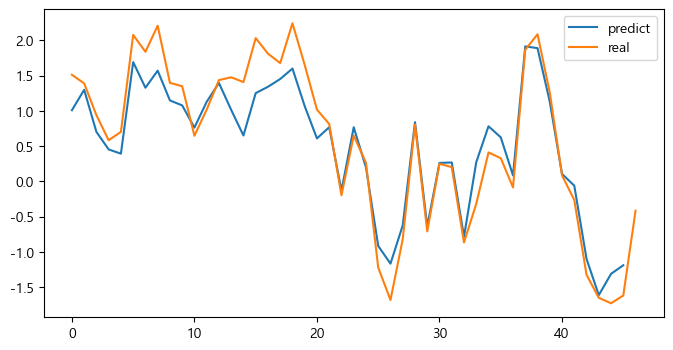

In [ ]:
test_df.plot(figsize=(8,4))

<AxesSubplot:>

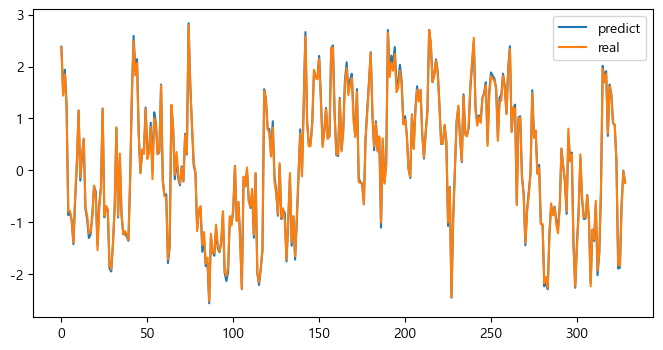

In [ ]:
train_df = pd.DataFrame({
    'predict':np.squeeze(ba, axis=1),
    'real':Y
})

train_df.plot(figsize=(8,4))

In [ ]:
def denormalization(array):
    

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: ./gold_model\assets
